In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
import sys
!{sys.executable} -m pip install xgboost

In [4]:
import xgboost

In [5]:
df=pd.read_excel("~\Desktop\daily_offers.xlsx")

In [6]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [7]:
df.shape

(181673, 14)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,181672.0,2.020459e+07,4.551119e+03,19950000.00,20200929.0,20201130.0,2.021020e+07,2.021040e+07
customer,181672.0,3.051221e+07,2.433382e+07,12458.00,30196884.0,30205242.0,3.028042e+07,2.147484e+09
country,181645.0,4.489302e+01,2.440421e+01,25.00,26.0,30.0,7.800000e+01,1.130000e+02
application,181649.0,2.561581e+01,1.775417e+01,2.00,10.0,15.0,4.100000e+01,9.900000e+01
thickness,181672.0,2.564827e+00,6.572321e+00,0.18,0.7,1.5,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.00,1180.0,1250.0,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.00,611993.0,640665.0,1.332077e+09,1.722208e+09
delivery date,181672.0,2.020738e+07,2.411059e+04,20190401.00,20201101.0,20210101.0,2.021040e+07,3.031010e+07
selling_price,181672.0,1.918036e+03,3.317956e+05,-1160.00,669.0,812.0,9.530000e+02,1.000010e+08


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [10]:
(df.isnull().sum()/len(df))*100


id                0.001101
item_date         0.000550
quantity tons     0.000000
customer          0.000550
country           0.015412
status            0.001101
item type         0.000000
application       0.013211
thickness         0.000550
width             0.000000
material_ref     42.889697
product_ref       0.000000
delivery date     0.000550
selling_price     0.000550
dtype: float64

In [11]:
df.drop(['material_ref','product_ref','quantity tons'],axis=1,inplace=True)

In [12]:
df.columns

Index(['id', 'item_date', 'customer', 'country', 'status', 'item type',
       'application', 'thickness', 'width', 'delivery date', 'selling_price'],
      dtype='object')

In [13]:
df[df['item_date'].isnull()].index

Int64Index([104640], dtype='int64')

In [14]:
df['item_date'].isnull().sum()

1

In [15]:
df['item_date'] = df['item_date'].apply(lambda x:str(x).split(".")[0])
df['item_date'] 

0         20210401
1         20210401
2         20210401
3         20210401
4         20210401
            ...   
181668    20200702
181669    20200702
181670    20200702
181671    20200702
181672    20200702
Name: item_date, Length: 181673, dtype: object

In [16]:
df[df['item_date'] == '19950000'].index

Int64Index([52], dtype='int64')

In [17]:
df.drop(52,axis= 0,inplace=True)

In [18]:
df[df['item_date'] == '19950000']

,id,item_date,customer,country,status,item type,application,thickness,width,delivery date,selling_price


In [19]:
df[df['item_date'] == '20191919'].index

Int64Index([105485], dtype='int64')

In [20]:
df.drop(105485,axis= 0,inplace=True)

In [21]:
df['item_date'] = pd.to_datetime(df['item_date'],errors='coerce')
df['item_date']

0        2021-04-01
1        2021-04-01
2        2021-04-01
3        2021-04-01
4        2021-04-01
            ...    
181668   2020-07-02
181669   2020-07-02
181670   2020-07-02
181671   2020-07-02
181672   2020-07-02
Name: item_date, Length: 181671, dtype: datetime64[ns]

In [22]:
df['delivery date'] = df['delivery date'].apply(lambda x:str(x).split(".")[0])
df['delivery date']

0         20210701
1         20210401
2         20210101
3         20210101
4         20210301
            ...   
181668    20200701
181669    20200701
181670    20200701
181671    20200701
181672    20200701
Name: delivery date, Length: 181671, dtype: object

In [23]:
df['delivery date'].unique()

array(['20210701', '20210401', '20210101', '20210301', '20210601',
       '20210501', '20210801', '30310101', '20210901', '20211001',
       '20211101', '20220101', '20200701', '20201001', '20200101',
       '20210201', '20211201', '20190701', '20200801', '20201101',
       '20201201', '20190401', '20200601', '20200401', '20200901',
       '20200501', 'nan', '20212222', '20191001'], dtype=object)

In [24]:
df[df['delivery date'] == 'nan'].index

Int64Index([104761], dtype='int64')

In [25]:
df.drop(104761,axis= 0,inplace=True)

In [26]:
df['delivery date'].unique()

array(['20210701', '20210401', '20210101', '20210301', '20210601',
       '20210501', '20210801', '30310101', '20210901', '20211001',
       '20211101', '20220101', '20200701', '20201001', '20200101',
       '20210201', '20211201', '20190701', '20200801', '20201101',
       '20201201', '20190401', '20200601', '20200401', '20200901',
       '20200501', '20212222', '20191001'], dtype=object)

In [27]:
df[df['delivery date'] == '20212222'].index

Int64Index([105421], dtype='int64')

In [28]:
df['delivery date'] = pd.to_datetime(df['delivery date'],errors='coerce')
df['delivery date']

0        2021-07-01
1        2021-04-01
2        2021-01-01
3        2021-01-01
4        2021-03-01
            ...    
181668   2020-07-01
181669   2020-07-01
181670   2020-07-01
181671   2020-07-01
181672   2020-07-01
Name: delivery date, Length: 181670, dtype: datetime64[ns]

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181670 entries, 0 to 181672
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             181668 non-null  object        
 1   item_date      181669 non-null  datetime64[ns]
 2   customer       181669 non-null  float64       
 3   country        181642 non-null  float64       
 4   status         181668 non-null  object        
 5   item type      181670 non-null  object        
 6   application    181646 non-null  float64       
 7   thickness      181669 non-null  float64       
 8   width          181670 non-null  float64       
 9   delivery date  181668 non-null  datetime64[ns]
 10  selling_price  181669 non-null  float64       
dtypes: datetime64[ns](2), float64(6), object(3)
memory usage: 16.6+ MB


In [30]:
df['customer'].isnull().any()

True

In [31]:
df[df['customer'].isnull()]

,id,item_date,customer,country,status,item type,application,thickness,width,delivery date,selling_price
104684,6E764168-3F32-4E5D-BD67-4B1D959C75E3,2020-11-12,NaN,39.0,Won,W,10.0,3.5,1270.0,2021-02-01,650.0


In [32]:
df.drop(104684,axis=0,inplace=True)

In [33]:
df['customer'].isnull().any()

False

In [34]:
df['customer'].value_counts()

30157111.0    4988
30161088.0    3733
30201846.0    3152
30165529.0    2728
30202938.0    2570
              ... 
30271383.0       1
30356502.0       1
30357481.0       1
30156053.0       1
30271291.0       1
Name: customer, Length: 1169, dtype: int64

In [35]:
df['customer'].dtypes

dtype('float64')

In [36]:
df.isnull().sum()

id                2
item_date         1
customer          0
country          28
status            2
item type         0
application      24
thickness         1
width             0
delivery date     2
selling_price     1
dtype: int64

In [37]:
df.dropna(axis=0,inplace=True)

In [38]:
df.isnull().sum()

id               0
item_date        0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
delivery date    0
selling_price    0
dtype: int64

In [39]:
df['country'].value_counts()

78.0     32084
26.0     27514
25.0     23361
27.0     21508
32.0     18658
28.0     15821
84.0     12776
77.0      9713
30.0      8702
39.0      3730
79.0      2742
38.0      1712
40.0      1683
80.0       817
113.0      714
89.0        92
107.0        5
Name: country, dtype: int64

In [40]:
df['status'].value_counts()

Won                116005
Lost                34431
Not lost for AM     19568
Revised              4276
To be approved       4167
Draft                3121
Offered                53
Offerable              10
Wonderful               1
Name: status, dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181632 entries, 0 to 181672
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             181632 non-null  object        
 1   item_date      181632 non-null  datetime64[ns]
 2   customer       181632 non-null  float64       
 3   country        181632 non-null  float64       
 4   status         181632 non-null  object        
 5   item type      181632 non-null  object        
 6   application    181632 non-null  float64       
 7   thickness      181632 non-null  float64       
 8   width          181632 non-null  float64       
 9   delivery date  181632 non-null  datetime64[ns]
 10  selling_price  181632 non-null  float64       
dtypes: datetime64[ns](2), float64(6), object(3)
memory usage: 16.6+ MB


In [42]:
df['item type'].value_counts()

W         105608
S          69202
PL          5660
Others       610
WI           524
IPL           27
SLAWR          1
Name: item type, dtype: int64

In [43]:
df['application'].unique()

array([10., 41., 28., 59., 15.,  4., 38., 56., 42., 26., 27., 19., 20.,
       66., 29., 22., 40., 25., 67., 79.,  3., 99.,  2.,  5., 39., 69.,
       70., 65., 58., 68.])

In [44]:
df['thickness'].value_counts()

2.00     13468
3.00     13206
0.50     12247
1.50     11731
1.00      9473
         ...  
7.06         1
9.39         1
15.66        1
2.28         1
15.60        1
Name: thickness, Length: 594, dtype: int64

In [45]:
df.drop(['id'],axis=1,inplace=True)

In [46]:
df.head()

,item_date,customer,country,status,item type,application,thickness,width,delivery date,selling_price
0,2021-04-01,30156308.0,28.0,Won,W,10.0,2.00,1500.0,2021-07-01,854.00
1,2021-04-01,30202938.0,25.0,Won,W,41.0,0.80,1210.0,2021-04-01,1047.00
2,2021-04-01,30153963.0,30.0,Won,WI,28.0,0.38,952.0,2021-01-01,644.33
3,2021-04-01,30349574.0,32.0,Won,S,59.0,2.30,1317.0,2021-01-01,768.00
4,2021-04-01,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2021-03-01,577.00


In [47]:
object_columns = [i for i in df.columns if df[i].dtypes == 'object']
numerical_columns = [i for i in df.columns if df[i].dtypes in ('int','float')]

In [48]:
object_columns

['status', 'item type']

In [49]:
numerical_columns

['customer', 'country', 'application', 'thickness', 'width', 'selling_price']

In [50]:
df['no_of_days_toprocess'] = (df['delivery date'] - df['item_date']).dt.days

In [51]:
df['no_of_days_toprocess']

0         91
1          0
2        -90
3        -90
4        -31
          ..
181668    -1
181669    -1
181670    -1
181671    -1
181672    -1
Name: no_of_days_toprocess, Length: 181632, dtype: int64

In [52]:
df.duplicated().any()

True

In [53]:
a = df.groupby('item type',as_index=False).size().rename(columns={'size':'Count'}).sort_values('Count',ascending=False)

In [54]:
a.head()

,item type,Count
5,W,105608
3,S,69202
2,PL,5660
1,Others,610
6,WI,524


# Bivariate Analysis of related columns

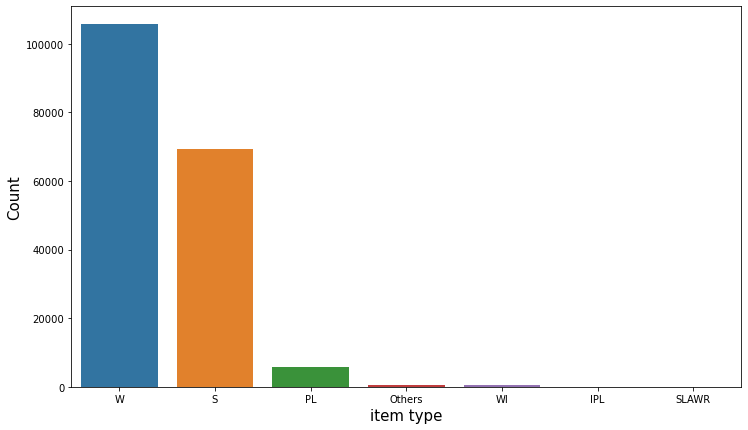

In [55]:
plt.figure(figsize=(12,7))
sns.barplot(x='item type',y = 'Count',data=a)
plt.xlabel(xlabel='item type', size=15)
plt.ylabel(ylabel='Count', size=15)
plt.show()

In [56]:
b = df.groupby('status',as_index=False).size().rename(columns={'size':'Count'}).sort_values('Count',ascending=False)

In [57]:
b.head()

,status,Count
7,Won,116005
1,Lost,34431
2,Not lost for AM,19568
5,Revised,4276
6,To be approved,4167


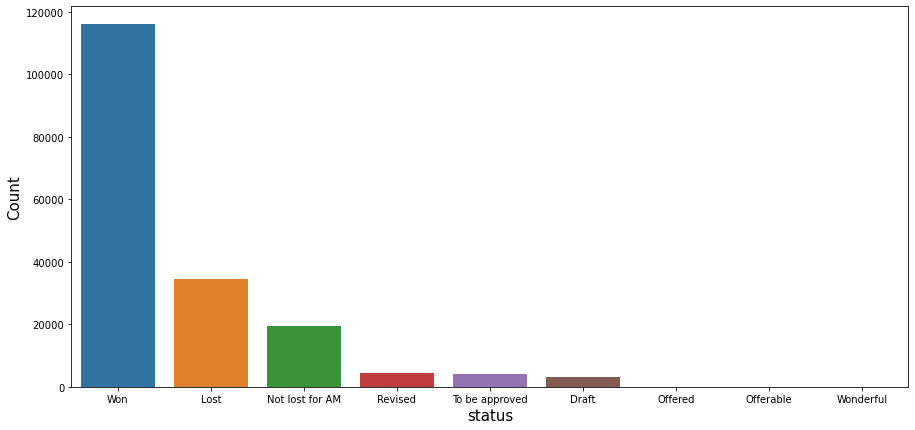

In [58]:
plt.figure(figsize=(15,7))
sns.barplot(x='status',y = 'Count',data=b)
plt.xlabel(xlabel='status', size=15)
plt.ylabel(ylabel='Count', size=15)
plt.show()

# Multivariate analysis

In [59]:
df.corr()

,customer,country,application,thickness,width,selling_price,no_of_days_toprocess
customer,1.000000,0.083573,0.000878,0.038763,0.050535,0.001747,0.018759
country,0.083573,1.000000,-0.019333,-0.019582,0.055280,0.002993,-0.199316
application,0.000878,-0.019333,1.000000,-0.059481,-0.204458,0.001462,-0.166503
thickness,0.038763,-0.019582,-0.059481,1.000000,0.161644,-0.001129,0.032911
width,0.050535,0.055280,-0.204458,0.161644,1.000000,0.000584,0.054090
selling_price,0.001747,0.002993,0.001462,-0.001129,0.000584,1.000000,-0.004252
no_of_days_toprocess,0.018759,-0.199316,-0.166503,0.032911,0.054090,-0.004252,1.000000


# Using Pearson Correlation

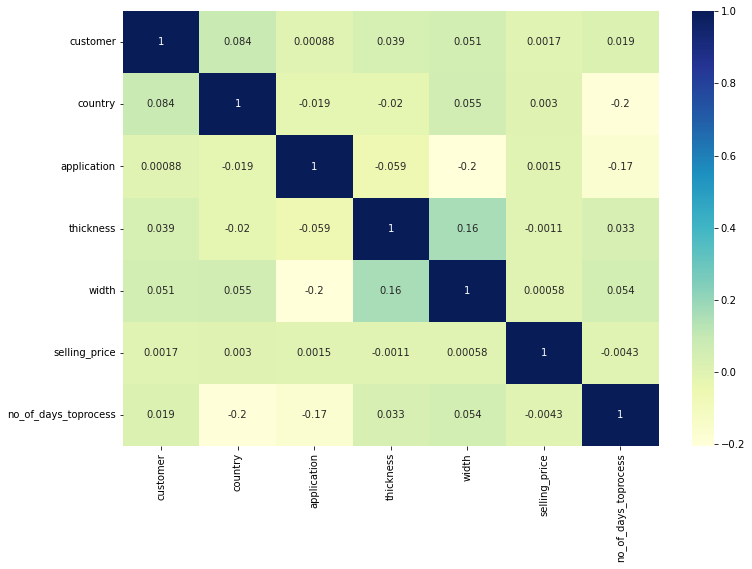

In [115]:

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")
plt.show()

C:\Users\PAJJU\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


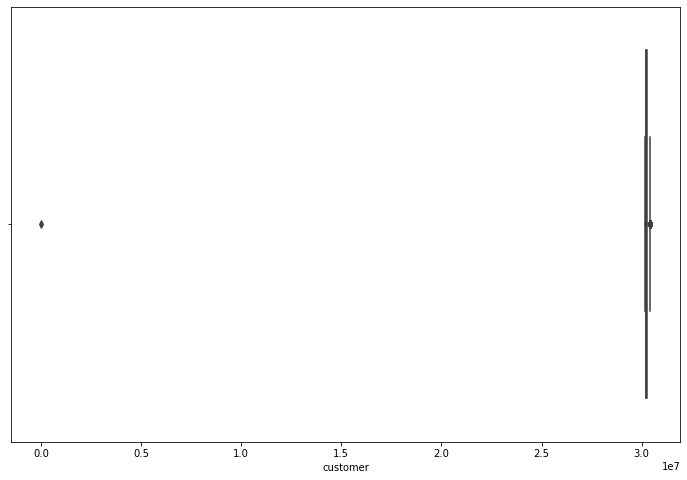

C:\Users\PAJJU\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


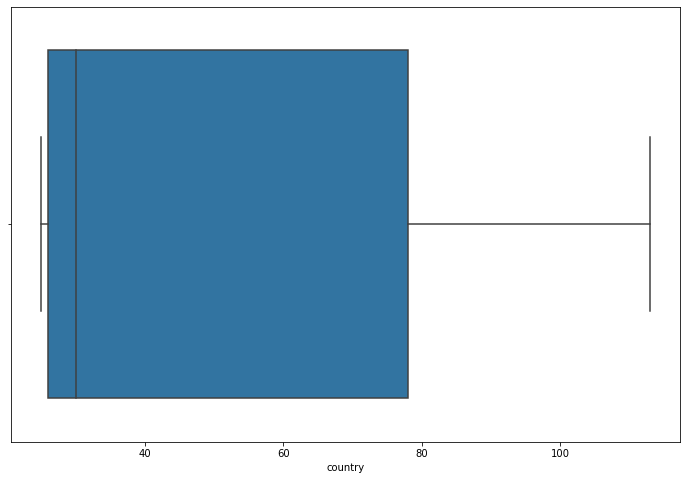

C:\Users\PAJJU\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


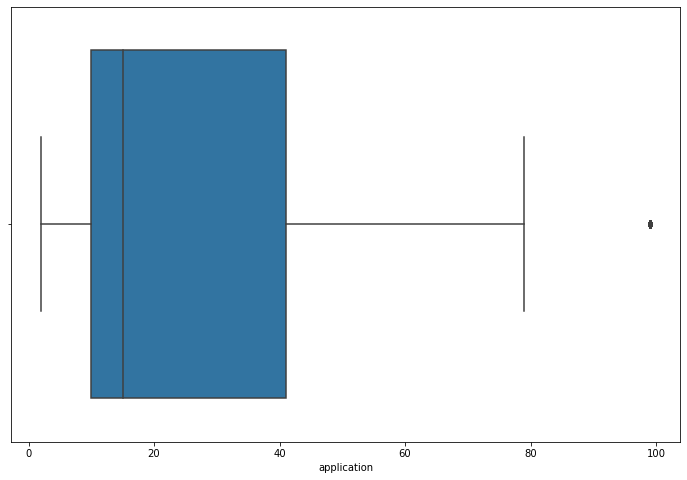

C:\Users\PAJJU\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


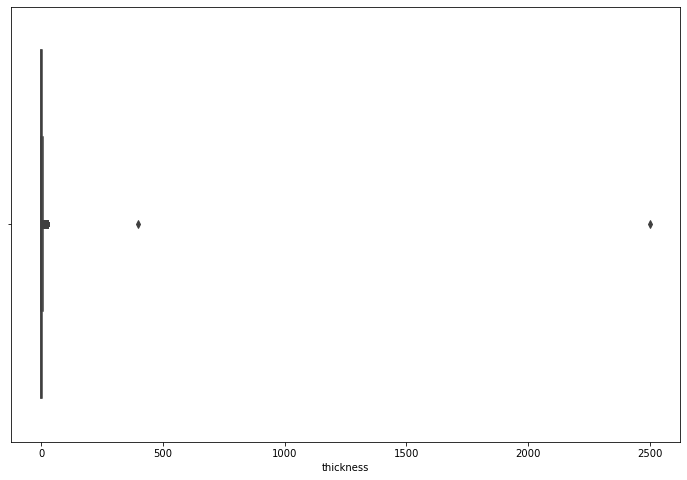

C:\Users\PAJJU\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


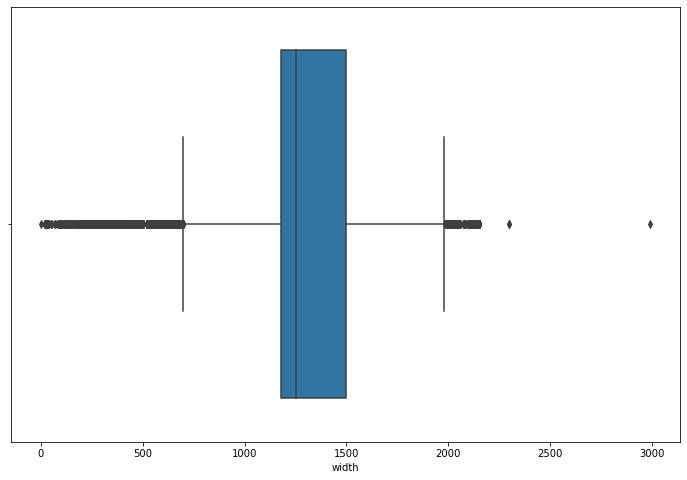

C:\Users\PAJJU\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


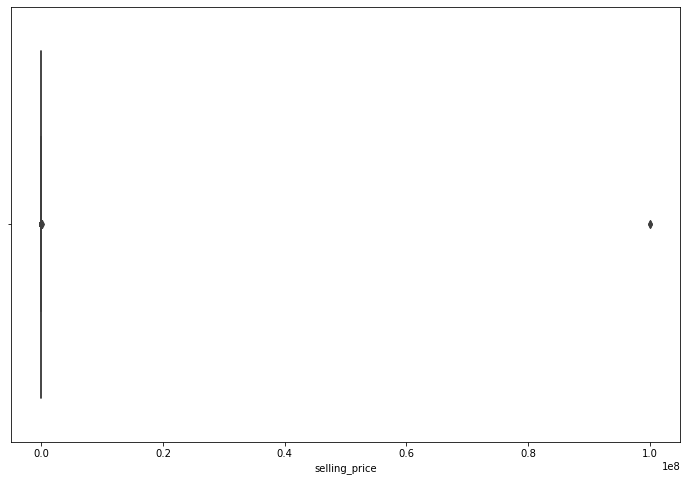

In [61]:
for i in numerical_columns:
    plt.figure(figsize=(12,8))
    sns.boxplot(df[i])
    plt.show()

In [62]:
df.columns

Index(['item_date', 'customer', 'country', 'status', 'item type',
       'application', 'thickness', 'width', 'delivery date', 'selling_price',
       'no_of_days_toprocess'],
      dtype='object')

In [63]:
df1 = df.copy()

In [64]:
df1.drop(['item_date','delivery date'],axis=1,inplace=True)

In [65]:
df2 = df1.copy()

In [66]:
df3 = pd.get_dummies(df2,drop_first=True)

In [67]:
df4 = df3.copy()

In [68]:
df3.head()

,customer,country,application,thickness,width,selling_price,no_of_days_toprocess,status_Lost,status_Not lost for AM,status_Offerable,...,status_Revised,status_To be approved,status_Won,status_Wonderful,item type_Others,item type_PL,item type_S,item type_SLAWR,item type_W,item type_WI
0,30156308.0,28.0,10.0,2.00,1500.0,854.00,91,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,30202938.0,25.0,41.0,0.80,1210.0,1047.00,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,30153963.0,30.0,28.0,0.38,952.0,644.33,-90,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,30349574.0,32.0,59.0,2.30,1317.0,768.00,-90,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,30211560.0,28.0,10.0,4.00,2000.0,577.00,-31,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [69]:
from sklearn.preprocessing import MinMaxScaler

In [70]:
from sklearn.preprocessing import MinMaxScaler
X = df3.drop('selling_price',axis=1)
y = df3['selling_price']

features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features
X.head()

,customer,country,application,thickness,width,no_of_days_toprocess,status_Lost,status_Not lost for AM,status_Offerable,status_Offered,status_Revised,status_To be approved,status_Won,status_Wonderful,item type_Others,item type_PL,item type_S,item type_SLAWR,item type_W,item type_WI
0,0.991713,0.034091,0.082474,0.000728,0.501506,0.686016,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.993248,0.000000,0.402062,0.000248,0.404483,0.605981,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.991636,0.056818,0.268041,0.000080,0.318167,0.526825,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.998072,0.079545,0.587629,0.000848,0.440281,0.526825,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.993531,0.034091,0.082474,0.001528,0.668786,0.578716,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.10,random_state=42)
X_train.shape, X_test.shape

((163468, 20), (18164, 20))

# LinearRegression

In [72]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [73]:
train_predictions = lm.predict(X_train)
print("Predicted train value :", train_predictions)

Predicted train value : [-1406.67829335  -947.81220079 -1217.73527298 ...   556.80713621
  6291.5262533   3155.93421125]


In [74]:
test_predictions = lm.predict(X_test)
print("Predicted test value :", test_predictions)

Predicted test value : [-4158.1650888   8966.25435163 -2045.489045   ...  5278.0535573
 -2795.30160358  1328.36672716]


In [75]:
lm.score(X_test,y_test)

-764.2225992917154

In [76]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [77]:
print('r2score_train:', r2_score(y_train, train_predictions))
print('r2score_test:', r2_score(y_test, test_predictions))
print('MAE:', mean_absolute_error(y_test, test_predictions))
print('MSE:', mean_squared_error(y_test, test_predictions))
print('RMSE train ',np.sqrt(mean_squared_error(y_train,train_predictions)))
print('RMSE test',np.sqrt(mean_squared_error(y_test,test_predictions)))

r2score_train: 0.0003005836631759795
r2score_test: -764.2225992917154
MAE: 3559.0921176388906
MSE: 38737667.5066733
RMSE train  349728.9218011446
RMSE test 6223.959150466309


# Ridge

In [78]:
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train)

Ridge(alpha=0.01)

In [79]:
train_predictions = rr.predict(X_train)
print("Predicted train value:", train_predictions)

Predicted train value: [-1404.82701504  -946.39089108 -1217.56043717 ...   558.53358949
  6293.63469687  3156.49558582]


In [80]:
test_predictions = rr.predict(X_test)
print("Predicted test value:", test_predictions)

Predicted test value: [-4157.67491433  8967.82478024 -2044.64538558 ...  5276.31401351
 -2795.67955798  1327.33959097]


In [81]:
rr.score(X_test,y_test)

-764.1898644455779

In [82]:
print('r2score_train:', r2_score(y_train, train_predictions))
print('r2score_test:', r2_score(y_test, test_predictions))
print('MAE:', mean_absolute_error(y_test, test_predictions))
print('MSE:', mean_squared_error(y_test, test_predictions))
print('RMSE train ',np.sqrt(mean_squared_error(y_train,train_predictions)))
print('RMSE test',np.sqrt(mean_squared_error(y_test,test_predictions)))

r2score_train: 0.0003005835196843165
r2score_test: -764.1898644455779
MAE: 3558.861517566964
MSE: 38736010.378947675
RMSE train  349728.9218262437
RMSE test 6223.826024154891


# Losso

In [83]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 

C:\Users\PAJJU\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.896e+15, tolerance: 2.000e+12
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.01)

In [84]:
train_predictions = model_lasso.predict(X_train)
print("Predicted train value :", train_predictions)

Predicted train value : [-1403.9795418   -946.53792507 -1217.50319889 ...   558.38940961
  6292.36650294  3156.61039569]


In [85]:
test_predictions = model_lasso.predict(X_test)
print("Predicted test value:", test_predictions)

Predicted test value: [-4157.43927337  8966.80766407 -2044.54405656 ...  5276.50125278
 -2793.50917474  1328.21249923]


In [86]:
print('r2score_train:', r2_score(y_train, train_predictions))
print('r2score_test:', r2_score(y_test, test_predictions))
print('MAE:', mean_absolute_error(y_test, test_predictions))
print('MSE:', mean_squared_error(y_test, test_predictions))
print('RMSE train ',np.sqrt(mean_squared_error(y_train,train_predictions)))
print('RMSE test',np.sqrt(mean_squared_error(y_test,test_predictions)))

r2score_train: 0.0003005826743321949
r2score_test: -764.1550964748338
MAE: 3558.747839737937
MSE: 38734250.32887622
RMSE train  349728.9219741102
RMSE test 6223.684626399077


# Decision Tree

In [87]:
dtr= DecisionTreeRegressor(random_state = 0) 
dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [88]:
train_predictions = dtr.predict(X_train)
print("Predicted train value:", train_predictions)

Predicted train value: [655.         754.4        788.         ... 645.8        874.
 632.33333333]


In [89]:
test_predictions = dtr.predict(X_test)
print("Predicted test value:", test_predictions)

Predicted test value: [1225.          795.69230769 1004.         ...  720.4         701.
  522.        ]


In [90]:
print('r2score_train:', r2_score(y_train, train_predictions))
print('r2score_test:', r2_score(y_test, test_predictions))
print('MAE:', mean_absolute_error(y_test, test_predictions))
print('MSE:', mean_squared_error(y_test, test_predictions))
print('RMSE train ',np.sqrt(mean_squared_error(y_train,train_predictions)))
print('RMSE test',np.sqrt(mean_squared_error(y_test,test_predictions)))

r2score_train: 0.999999734429538
r2score_test: 0.8128475070709118
MAE: 46.244021071295776
MSE: 9474.172679743715
RMSE train  180.254748475459
RMSE test 97.33536191818324


# Knn Regressor

In [91]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [92]:
train_predictions = knn.predict(X_train)
print("Predicted train value :", train_predictions)

Predicted train value : [730.2  803.16 805.6  ... 639.   783.4  644.4 ]


In [93]:
test_predictions = knn.predict(X_test)
print("Predicted test value:", test_predictions)

Predicted test value: [1228.4  821.8 1044.2 ...  720.4  693.4  514.8]


In [94]:
print('r2score_train:', r2_score(y_train, train_predictions))
print('r2score_test:', r2_score(y_test, test_predictions))
print('MAE:', mean_absolute_error(y_test, test_predictions))
print('MSE:', mean_squared_error(y_test, test_predictions))
print('RMSE train ',np.sqrt(mean_squared_error(y_train,train_predictions)))
print('RMSE test',np.sqrt(mean_squared_error(y_test,test_predictions)))

r2score_train: 0.27999589807969627
r2score_test: -870021.6827378451
MAE: 2265.926685641929
MSE: 44042935269.23733
RMSE train  296800.2859517626
RMSE test 209864.08761204794


# Random Forest Regressor

In [95]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [96]:
train_predictions = rf_model.predict(X_train)
print("Predicted train value :", train_predictions)

Predicted train value : [662.56566667 754.02458333 817.         ... 642.93       856.27326625
 632.26696429]


In [97]:
test_predictions = rf_model.predict(X_test)
print("Predicted test value:", test_predictions)

Predicted test value: [1258.6345      794.76885317  997.68183333 ...  721.64780952  691.22166667
  518.91833333]


In [98]:
print('r2score_train:', r2_score(y_train, train_predictions))
print('r2score_test:', r2_score(y_test, test_predictions))
print('MAE:', mean_absolute_error(y_test, test_predictions))
print('MSE:', mean_squared_error(y_test, test_predictions))
print('RMSE train ',np.sqrt(mean_squared_error(y_train,train_predictions)))
print('RMSE test',np.sqrt(mean_squared_error(y_test,test_predictions)))

r2score_train: 0.7973467841557578
r2score_test: 0.8874113156939107
MAE: 42.08087762353092
MSE: 5699.548107570259
RMSE train  157461.20825600118
RMSE test 75.49535156266417


# Ada Boost Regressor

In [99]:
ada_reg = AdaBoostRegressor()
ada_reg.fit(X_train, y_train)

AdaBoostRegressor()

In [100]:
train_predictions = ada_reg.predict(X_train)
print("Predicted train value :", train_predictions)

Predicted train value : [762.92803365 762.92803365 763.20133417 ... 762.92803365 957.04315606
 762.92803365]


In [101]:
test_predictions = ada_reg.predict(X_test)
print("Predicted test value:", test_predictions)

Predicted test value: [959.56328439 762.92803365 763.20133417 ... 762.92803365 763.20133417
 762.61780785]


In [102]:
print('r2score_train:', r2_score(y_train, train_predictions))
print('r2score_test:', r2_score(y_test, test_predictions))
print('MAE:', mean_absolute_error(y_test, test_predictions))
print('MSE:', mean_squared_error(y_test, test_predictions))
print('RMSE train ',np.sqrt(mean_squared_error(y_train,train_predictions)))
print('RMSE test',np.sqrt(mean_squared_error(y_test,test_predictions)))

r2score_train: 0.9691609103016642
r2score_test: 0.16969627839016788
MAE: 153.42528915879646
MSE: 42032.25248058003
RMSE train  61425.34505310002
RMSE test 205.0176882139198


# Gradient Boost Regressor

In [103]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

In [104]:
train_predictions = gbr.predict(X_train)
print("Predicted train value :", train_predictions)

Predicted train value : [828.8075635  348.87774803 813.44068958 ... 587.73460919 313.85154546
 701.46120222]


In [105]:
test_predictions = gbr.predict(X_test)
print("Predicted test value:", test_predictions)

Predicted test value: [-2249.66531492 -2054.53756962   811.85653631 ...   178.30397255
  1134.18197356   457.14865189]


In [106]:
print('r2score_train:', r2_score(y_train, train_predictions))
print('r2score_test:', r2_score(y_test, test_predictions))
print('MAE:', mean_absolute_error(y_test, test_predictions))
print('MSE:', mean_squared_error(y_test, test_predictions))
print('RMSE train ',np.sqrt(mean_squared_error(y_train,train_predictions)))
print('RMSE test',np.sqrt(mean_squared_error(y_test,test_predictions)))

r2score_train: 0.5634060043403826
r2score_test: -332352.12726721144
MAE: 4045.887870431884
MSE: 16824627174.88602
RMSE train  231119.0315614638
RMSE test 129709.78056756561


# XG Boost

In [111]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor()
xg_reg.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [112]:
train_predictions = xg_reg.predict(X_train)
print("Predicted train value :", train_predictions)

Predicted train value : [672.35834 780.906   916.41656 ... 683.19214 866.3077  654.03613]


In [113]:
test_predictions = xg_reg.predict(X_test)
print("Predicted test value:", test_predictions)

Predicted test value: [1171.5476   866.67236  937.9476  ...  653.99255  813.0762   540.29047]


In [114]:
print('r2score_train:', r2_score(y_train, train_predictions))
print('r2score_test:', r2_score(y_test, test_predictions))
print('MAE:', mean_absolute_error(y_test, test_predictions))
print('MSE:', mean_squared_error(y_test, test_predictions))
print('RMSE train ',np.sqrt(mean_squared_error(y_train,train_predictions)))
print('RMSE test',np.sqrt(mean_squared_error(y_test,test_predictions)))

r2score_train: 0.9999996195524473
r2score_test: 0.7537157897194858
MAE: 81.12523352786533
MSE: 12467.582450937496
RMSE train  215.7467325393018
RMSE test 111.65832907104377
